In [1]:
from regain.datasets.hmm import generate_hmm
from regain.hmm.hmm_graphical_lasso import HMM_GraphicalLasso 
import numpy as np
from importlib import reload
import regain.hmm.utils; reload(regain.hmm.utils)
from regain.hmm.utils import results_recap
from regain.hmm.utils import cross_validation#, cross_validation_auto
import pickle as pkl
from sklearn import cluster
from sklearn.mixture import GaussianMixture
from pomegranate import *

/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
st = 5
dim =10
mm = 'Normal'
cluster_list = [3,4,5,6,7,8]

res_all = {}

#if st == 2:
#    alpha_list = np.linspace(45,65 ,2)
#elif st == 5:
#    alpha_list = np.linspace(25,35 ,20)
#elif st == 10:
# alpha_list = np.linspace(15,25 ,20)
#elif st == 15:
#    alpha_list = np.linspace(5,15 ,20)


print('Case: N_states:',st,',TS dim:',dim,',Mean mode:',mm)

# Generate a dataset
dataset = generate_hmm(n_samples=1000,
                       n_states=st,
                       n_dim_obs=dim,
                       mode_precisions='regain',
                       mode_mean = mm,
                       transition_type='fixed',
                       sigma=1)

Case: N_states: 5 ,TS dim: 10 ,Mean mode: Normal


In [8]:
# CV hmm_gmm 

hmm_gmm = HMM_GraphicalLasso(alpha=25,
                             n_clusters=st,
                             verbose=False,
                             mode='scaled',
                             warm_restart=True,
                             repetitions=5,
                             n_jobs=-1)

hmm_gmm.fit(dataset['data'])

print(hmm_gmm.lambdas)

print(results_recap(dataset['states'],hmm_gmm.labels_,dataset['thetas'],hmm_gmm.precisions_))

[0.12022524 0.20682266 0.10789652 0.11292006 0.11463608]
{'homogeneity [0, 1]': 0.9034777489646278, 'completeness [0, 1]': 0.9046199256775925, 'v_measure [0, 1]': 0.9040484765641494, 'adjusted_mutual_info [0, 1]': 0.9035592014266286, 'weighted_mean_mcc [-1, 1]': (0.8531765540550733,), 'max_cluster_mean_mcc[-1,1]': (0.8759817807312491,), 'weighted_mean_f1 [0, 1]': (0.7694647339968577,), 'max_cluster_mean_f1[0,1]': (0.7837012263099219,), 'probabilities_clusters': (array([[0.00483092, 0.00826446, 0.01724138, 0.93665158, 0.00913242],
       [0.00483092, 0.99173554, 0.00431034, 0.01357466, 0.        ],
       [0.        , 0.        , 0.        , 0.00452489, 0.98630137],
       [0.98067633, 0.        , 0.00862069, 0.00904977, 0.        ],
       [0.00966184, 0.        , 0.96982759, 0.0361991 , 0.00456621]]),), 'max_probabilities_couples': ['Couple: (1, 1), Probability: 0.9917355371900827, MCC: 0.73010947505141, F1_score: 0.7', 'Couple: (2, 4), Probability: 0.9863013698630136, MCC: 0.83862786

In [ ]:
hmm_gmm.lambdas

In [4]:
res = cross_validation(hmm_gmm,
       dataset['data'],
       params={'alpha':np.linspace(18,25 ,10),
               'n_clusters':cluster_list},
       n_repetitions=5)

100%|██████████| 10/10 [4:33:56<00:00, 1643.64s/it]


In [5]:
with open('Test_bic.pickle', 'wb') as f:
    pkl.dump([res], f)

In [6]:
res_alpha_fede = res[1]
couples = []
mean_bic = []
std_bic =[]
dispersion_coeff = []
for k in res_alpha_fede.keys():
    couples.append(k)
    mean_bic.append(res_alpha_fede[k]['mean_bic'])
    std_bic.append(res_alpha_fede[k]['std_bic'])
    dispersion_coeff.append(res_alpha_fede[k]['dispersion_coefficient'])

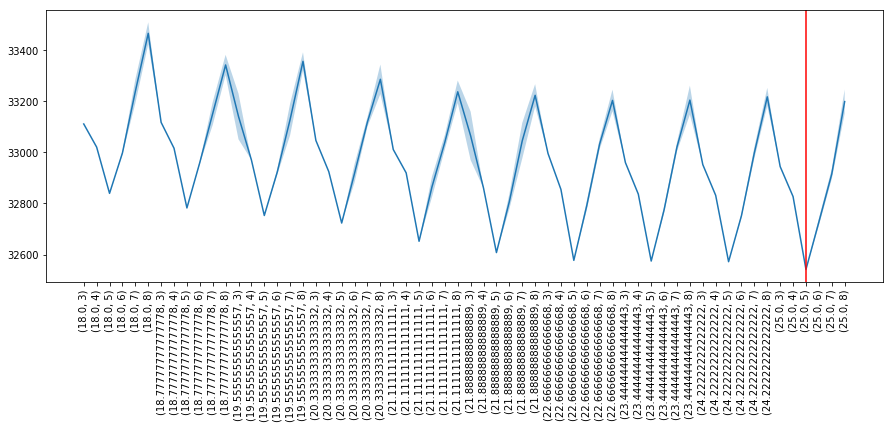

In [7]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,5))
plt.plot(mean_bic)
plt.fill_between(np.arange(len(mean_bic)), np.array(mean_bic)-np.array(std_bic),
                 np.array(mean_bic)+np.array(std_bic), alpha=0.3)
plt.axvline(np.argmin(mean_bic), color='red')
plt.xticks(np.arange(len(mean_bic)),couples, rotation='vertical')
plt.show()

#plt.figure(figsize=(15,10))
#plt.plot(dispersion_coeff)
#plt.axvline(np.argmin(dispersion_coeff), color='red')
#plt.xticks(np.arange(len(mean_bic)),couples, rotation='vertical')
#plt.show()

#plt.figure(figsize=(15,5))
#final_res = np.array(mean_bic/np.sum(mean_bic)) + np.array(dispersion_coeff)
#plt.plot(final_res)
#plt.axvline(np.argmin(final_res), color='red')
#plt.xticks(np.arange(len(mean_bic)),couples, rotation='vertical')
#plt.show()